In [221]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [222]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [224]:
df.shape

(891, 12)

In [225]:
df=df.drop(columns=['Cabin','Ticket','PassengerId','Name'],axis=1)

In [226]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [227]:
X = df

In [228]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [229]:
from sklearn.preprocessing import OneHotEncoder
X['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [230]:
X.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [231]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X['Age'] = pd.DataFrame(imputer.fit_transform(np.array(X['Age']).reshape(-1,1)))

In [232]:
X=X.dropna()
X.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [233]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
sex = pd.DataFrame(encode.fit_transform(np.array(X['Sex'])))
emb = pd.DataFrame(encode.fit_transform(np.array(X['Embarked'])))
X = X.drop(columns=['Sex','Embarked'],axis=1)

In [234]:
X['Age'] = sex
X['Embarked'] = emb

In [235]:
X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,1,0,7.2500,2.0
1,1,1,0.0,1,0,71.2833,0.0
2,1,3,0.0,0,0,7.9250,2.0
3,1,1,0.0,1,0,53.1000,2.0
4,0,3,1.0,0,0,8.0500,2.0


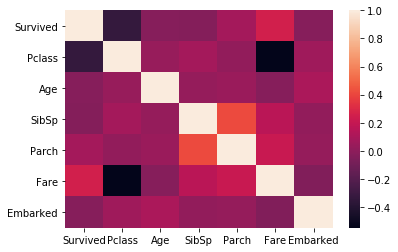

In [236]:
sns.heatmap(X.corr())

In [237]:
X = X.dropna()

In [238]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.drop(columns=['Survived']),X['Survived'])

In [273]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(10,),max_iter=300, activation='logistic', solver='adam')

In [274]:
model.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=300)

In [275]:
from sklearn.metrics import accuracy_score
print("Training Accuracy : ",accuracy_score(y_true=y_train, y_pred=model.predict(X_train)))
print("Test data Accuracy : ",accuracy_score(y_true=y_test, y_pred=model.predict(X_test)))

Training Accuracy :  0.6842105263157895
Test data Accuracy :  0.7117117117117117


In [278]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       148
           1       0.56      0.59      0.58        74

    accuracy                           0.71       222
   macro avg       0.68      0.68      0.68       222
weighted avg       0.72      0.71      0.71       222



In [279]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=model.predict(X_test)))

[[114  34]
 [ 30  44]]
